# 가랏, 몬스터볼! 전설의 포켓몬 찾아 삼만리

## 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import os
csv_path = "/content/drive/MyDrive/on6Core/Quest_python/Pokemon.csv"
original_data = pd.read_csv(csv_path)

## 데이터 확인

In [3]:
pokemon = original_data.copy()
print(pokemon.shape)
pokemon.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
# 전설의 포켓몬 데이터셋
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)
print(legendary.shape)
legendary.head()

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [5]:
# Q. 일반 포켓몬의 데이터셋도 만들어봅시다.
ordinary = pokemon[pokemon["Legendary"] == False].reset_index(drop=True)
print(ordinary.shape)
ordinary.head()

(735, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [6]:
# 결측치 확인
pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [7]:
# 컬럼 확인
print(len(pokemon.columns))
pokemon.columns

13


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [8]:
len(set(pokemon["#"]))

721

In [9]:
pokemon[pokemon["#"] == 6]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


In [10]:
# Q. 총 몇 종류의 포켓몬 이름이 있는지 확인해봅시다!
len(original_data['Name'])

800

In [11]:
pokemon.loc[[6, 10]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False


In [12]:
# 각 속성의 종류
len(list(set(pokemon["Type 1"]))), len(list(set(pokemon["Type 2"])))
# Type1 : 18
# Type2 : 19

(18, 19)

In [13]:
# 차집합
set(pokemon["Type 2"]) - set(pokemon["Type 1"])

{nan}

In [14]:
types = list(set(pokemon["Type 1"]))
print(len(types))
print(types)

18
['Rock', 'Fire', 'Dark', 'Ghost', 'Poison', 'Water', 'Electric', 'Grass', 'Ice', 'Ground', 'Dragon', 'Steel', 'Bug', 'Fairy', 'Normal', 'Psychic', 'Flying', 'Fighting']


In [15]:
# 누락된 값(NaN) 확인
pokemon["Type 2"].isna().sum()

386

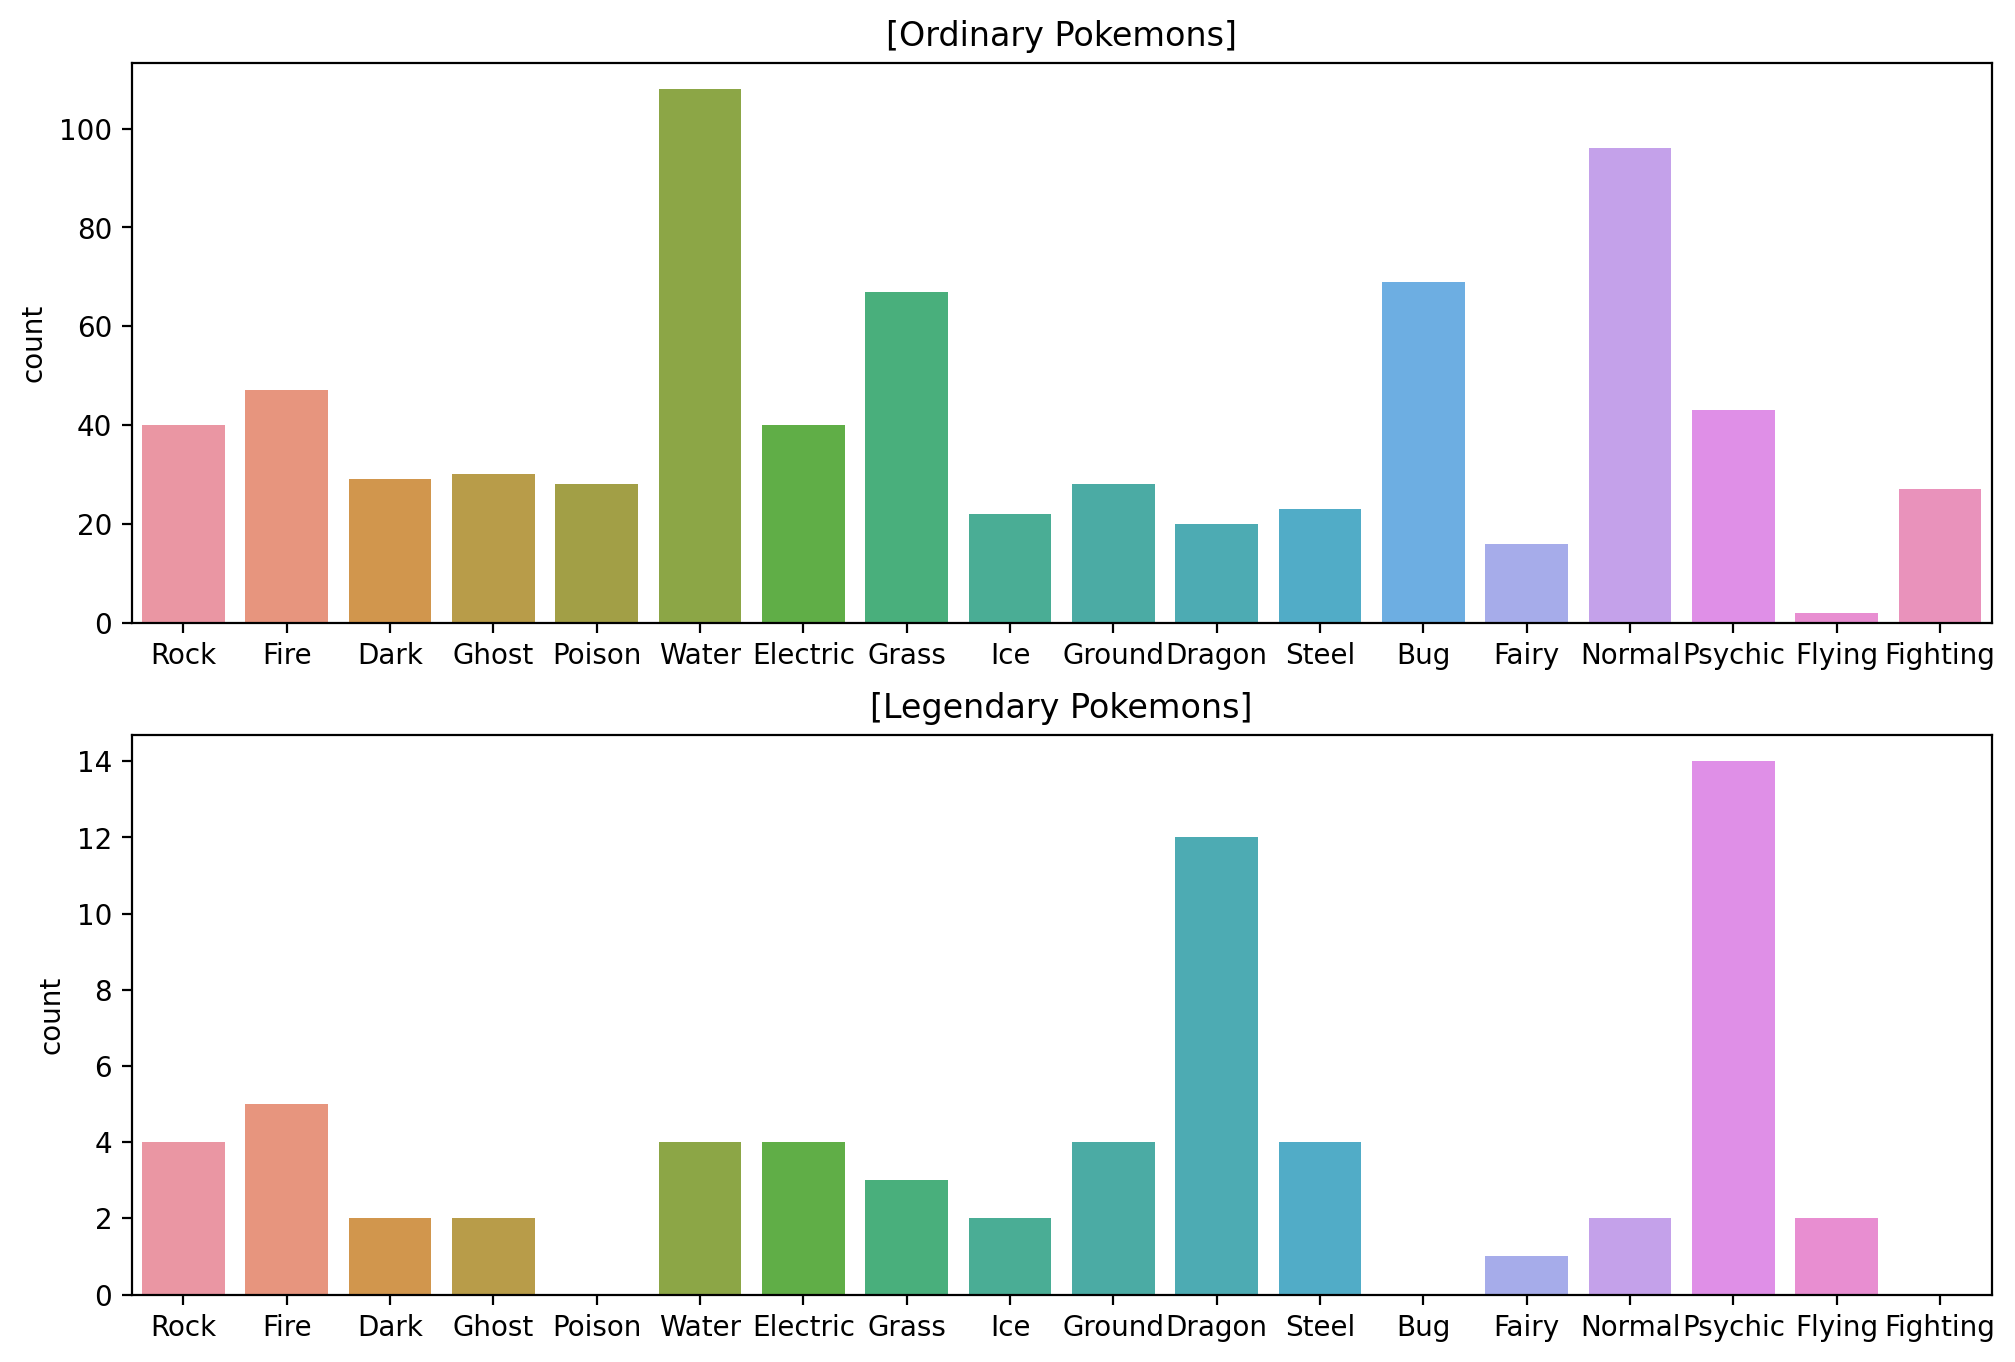

In [16]:
# Type1 데이터 분포 plot
plt.figure(figsize=(12, 8))

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 1", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

In [17]:
# Type1별로 Legendary의 비율을 보여주는 피벗 테이블
pd.pivot_table(pokemon, index="Type 1", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 1,
Flying,0.500000
Dragon,0.375000
Psychic,0.245614
Steel,0.148148
Ground,0.125000
Fire,0.096154
Electric,0.090909
Rock,0.090909
Ice,0.083333


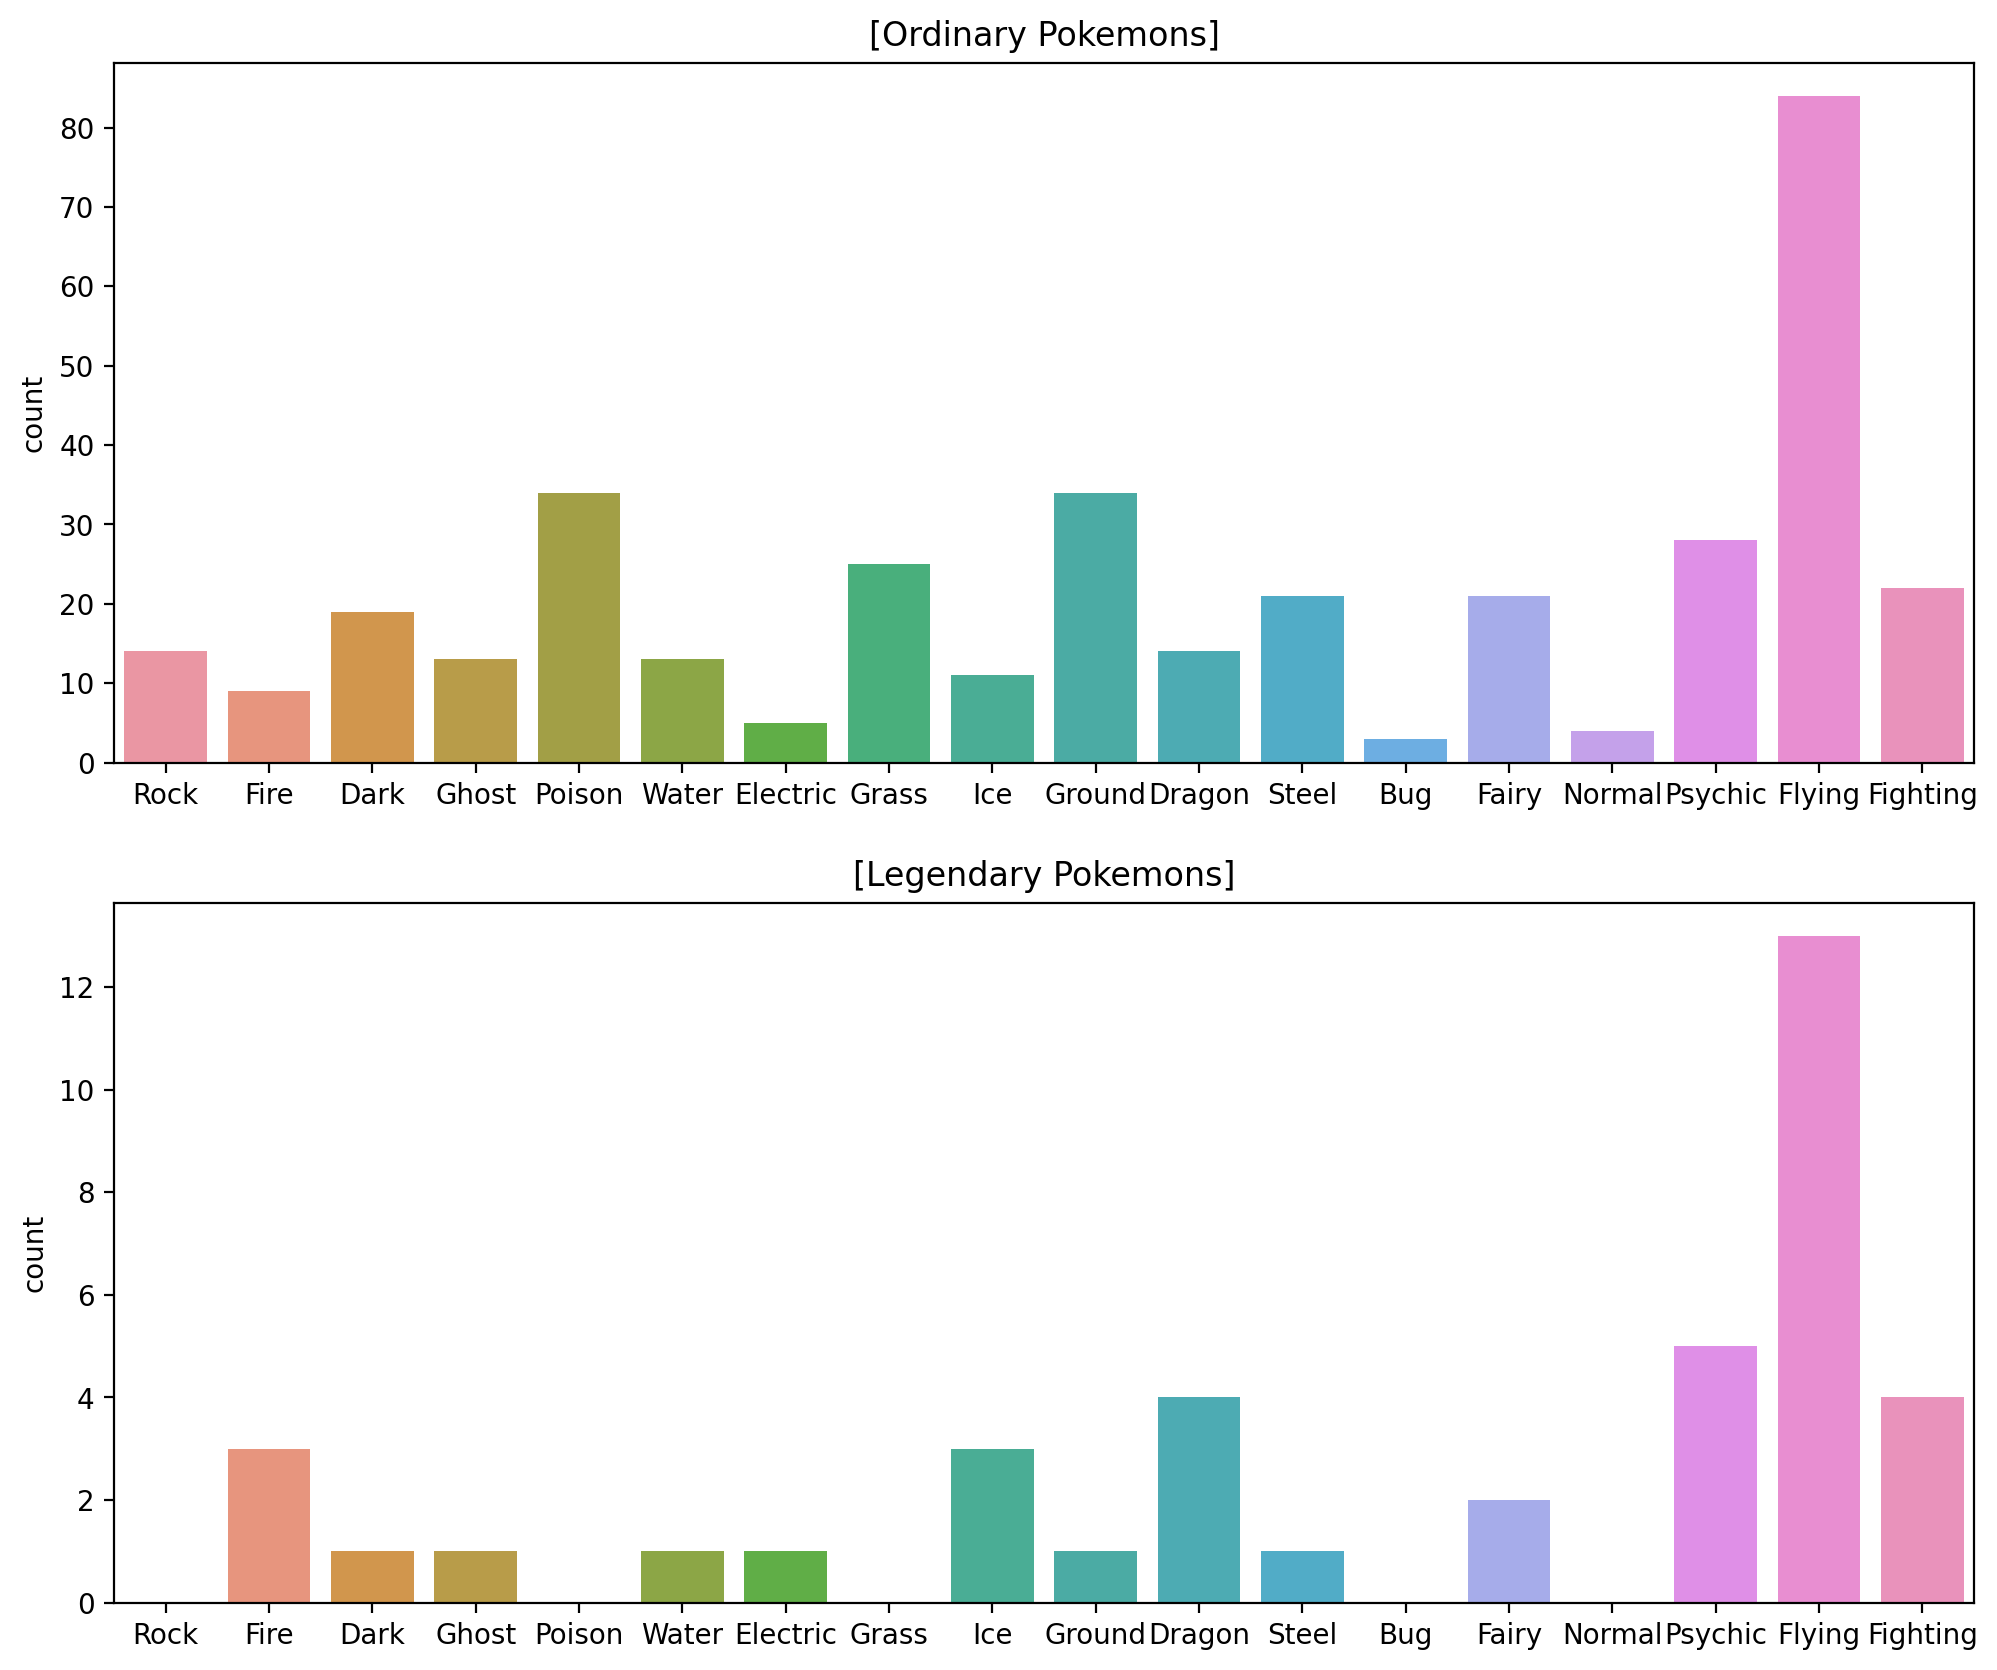

In [18]:
# Type1 데이터 분포 plot
# Q. 아래 코드의 빈칸을 채워주세요.
plt.figure(figsize=(12, 10))

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 2", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 2", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

In [19]:
# Type 2에 대해서도 피벗 테이블을 만들어봅시다.
pd.pivot_table(pokemon, index="Type 2", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 2,
Fire,0.250000
Dragon,0.222222
Ice,0.214286
Electric,0.166667
Fighting,0.153846
Psychic,0.151515
Flying,0.134021
Fairy,0.086957
Water,0.071429


In [20]:
# Total : 모든 스탯의 총합
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
stats

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [21]:
# 첫 번째 포켓몬 검증
print("#0 pokemon: ", pokemon.loc[0, "Name"])
print("total: ", int(pokemon.loc[0, "Total"]))
print("stats: ", list(pokemon.loc[0, stats]))
print("sum of all stats: ", sum(list(pokemon.loc[0, stats])))

#0 pokemon:  Bulbasaur
total:  318
stats:  [45, 49, 49, 65, 65, 45]
sum of all stats:  318


In [22]:
# Q. 'pokemon['Total'].values'와 'pokemon[stats].values의 총합'이 같은 포켓몬의 수를 확인해봅시다.
np.sum(original_data['Total'].values == np.sum(original_data[stats].values, axis=1))

800

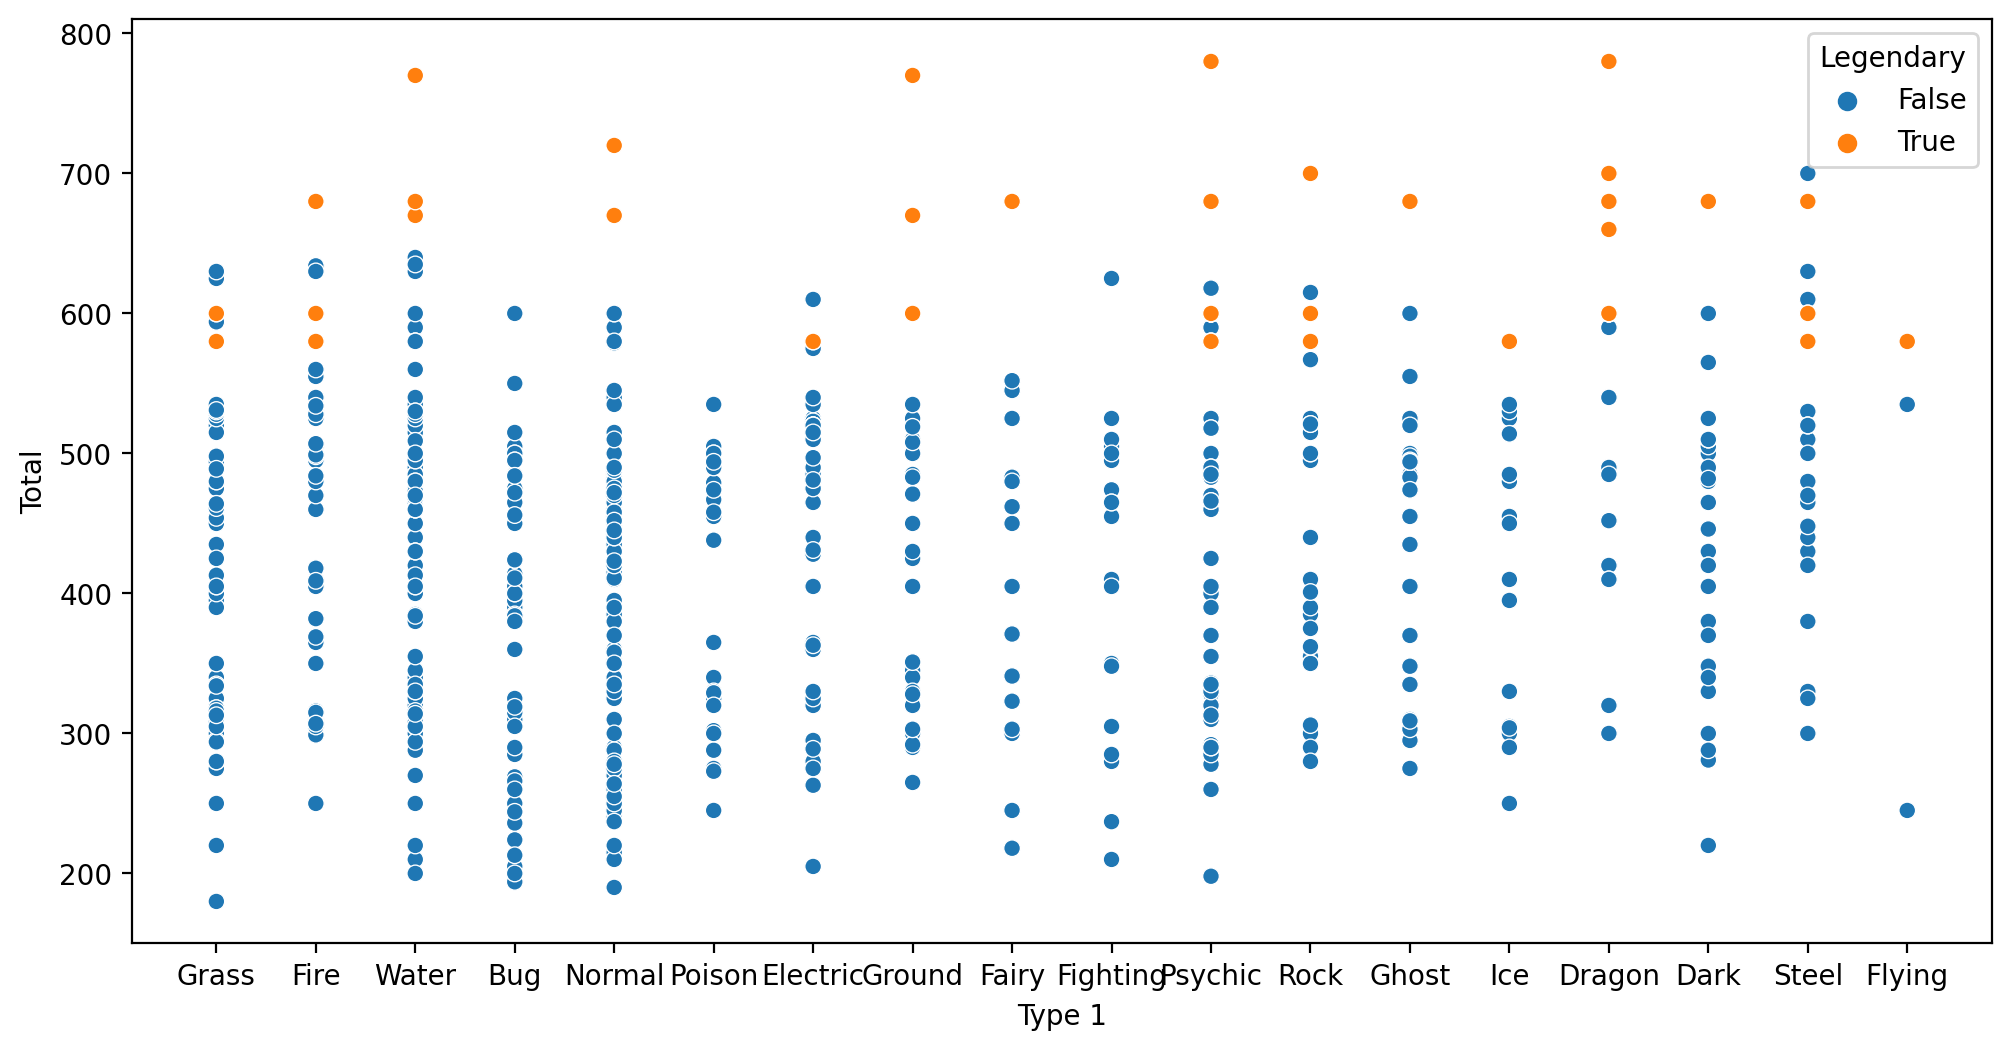

In [23]:
# Total 값에 따른 분포 plot
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)

sns.scatterplot(data=pokemon, x="Type 1", y="Total", hue="Legendary")
plt.show()

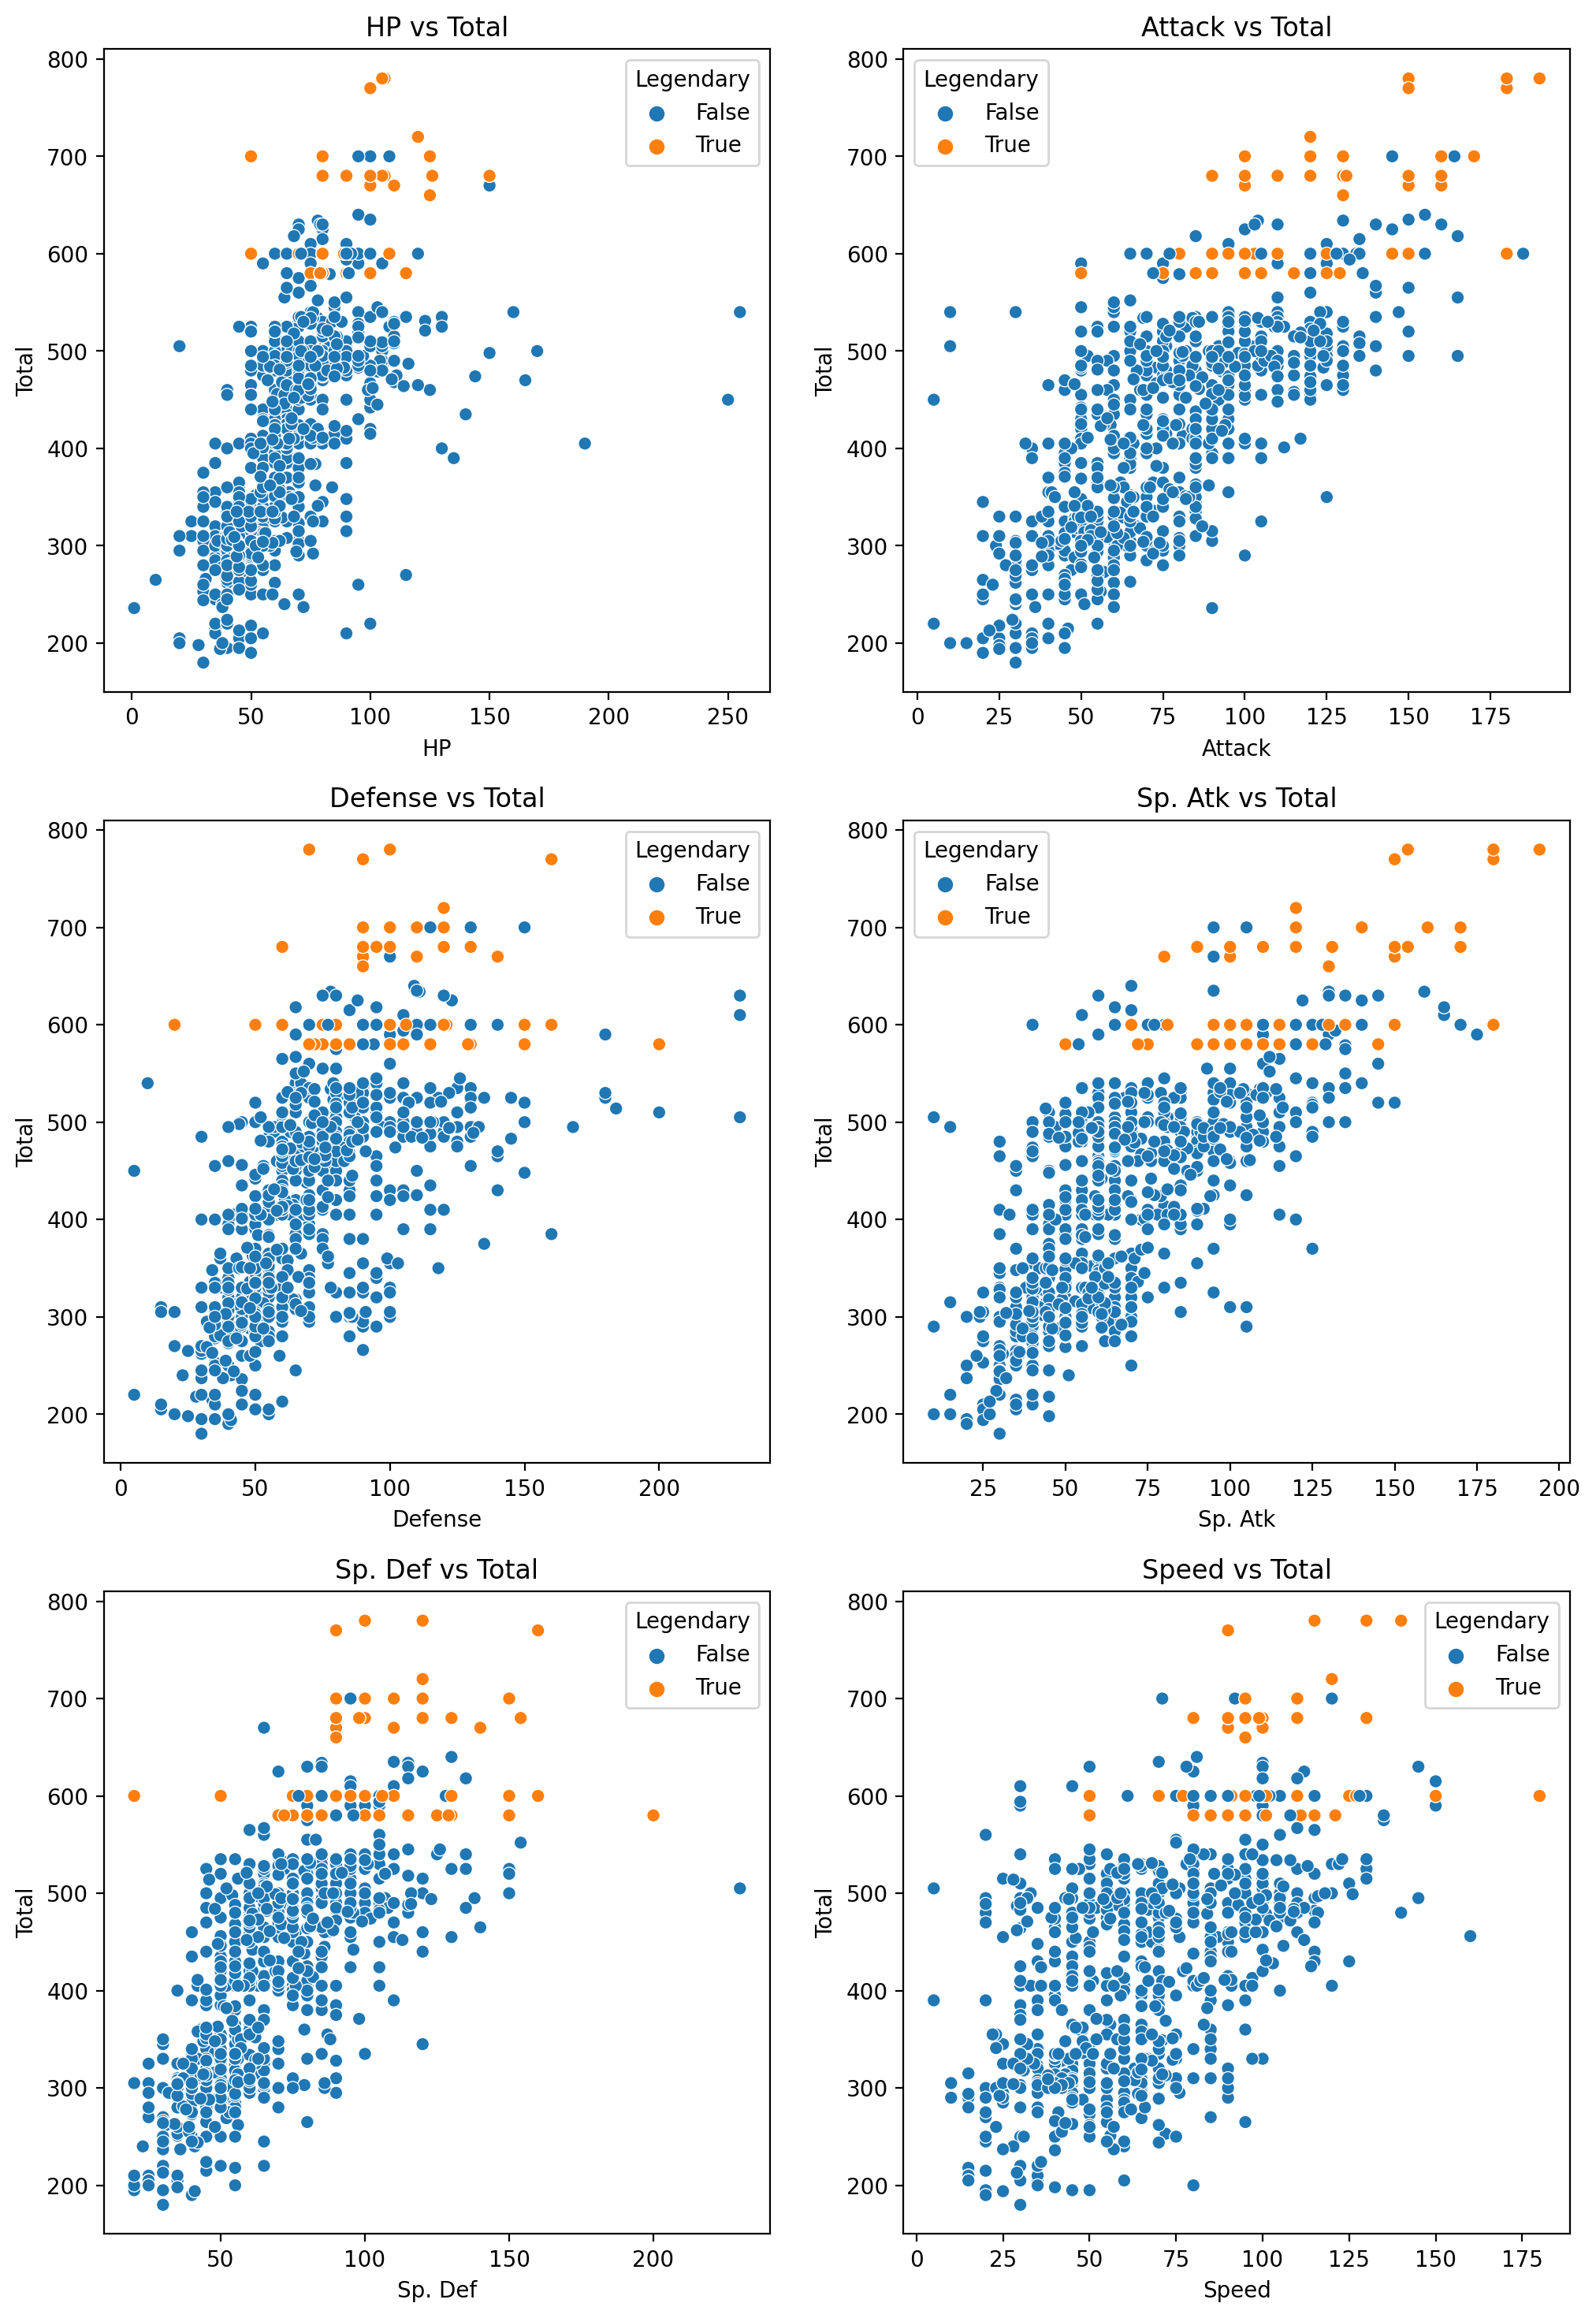

In [24]:
# Q. 다음 코드의 빈칸을 채워주세요.
# 각각의 스탯에 대한 scatter plot을 6개의 subplot으로 표현합니다.

figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(12, 18)  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

# "HP" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="HP", hue="Legendary", ax=ax1)
ax1.set_title("HP vs Total")

# "Attack" 스탯의 scatter plot
sns.scatterplot(data=original_data, y="Total", x="Attack", hue="Legendary", ax=ax2)
ax2.set_title("Attack vs Total")

# "Defense" 스탯의 scatter plot
sns.scatterplot(data=original_data, y="Total", x="Defense", hue="Legendary", ax=ax3)
ax3.set_title("Defense vs Total")

# "Sp. Atk" 스탯의 scatter plot
sns.scatterplot(data=original_data, y="Total", x="Sp. Atk", hue="Legendary", ax=ax4)
ax4.set_title("Sp. Atk vs Total")

# "Sp. Def" 스탯의 scatter plot
sns.scatterplot(data=original_data, y="Total", x="Sp. Def", hue="Legendary", ax=ax5)
ax5.set_title("Sp. Def vs Total")

# "Speed" 스탯의 scatter plot
sns.scatterplot(data=original_data, y="Total", x="Speed", hue="Legendary", ax=ax6)
ax6.set_title("Speed vs Total")


plt.show()

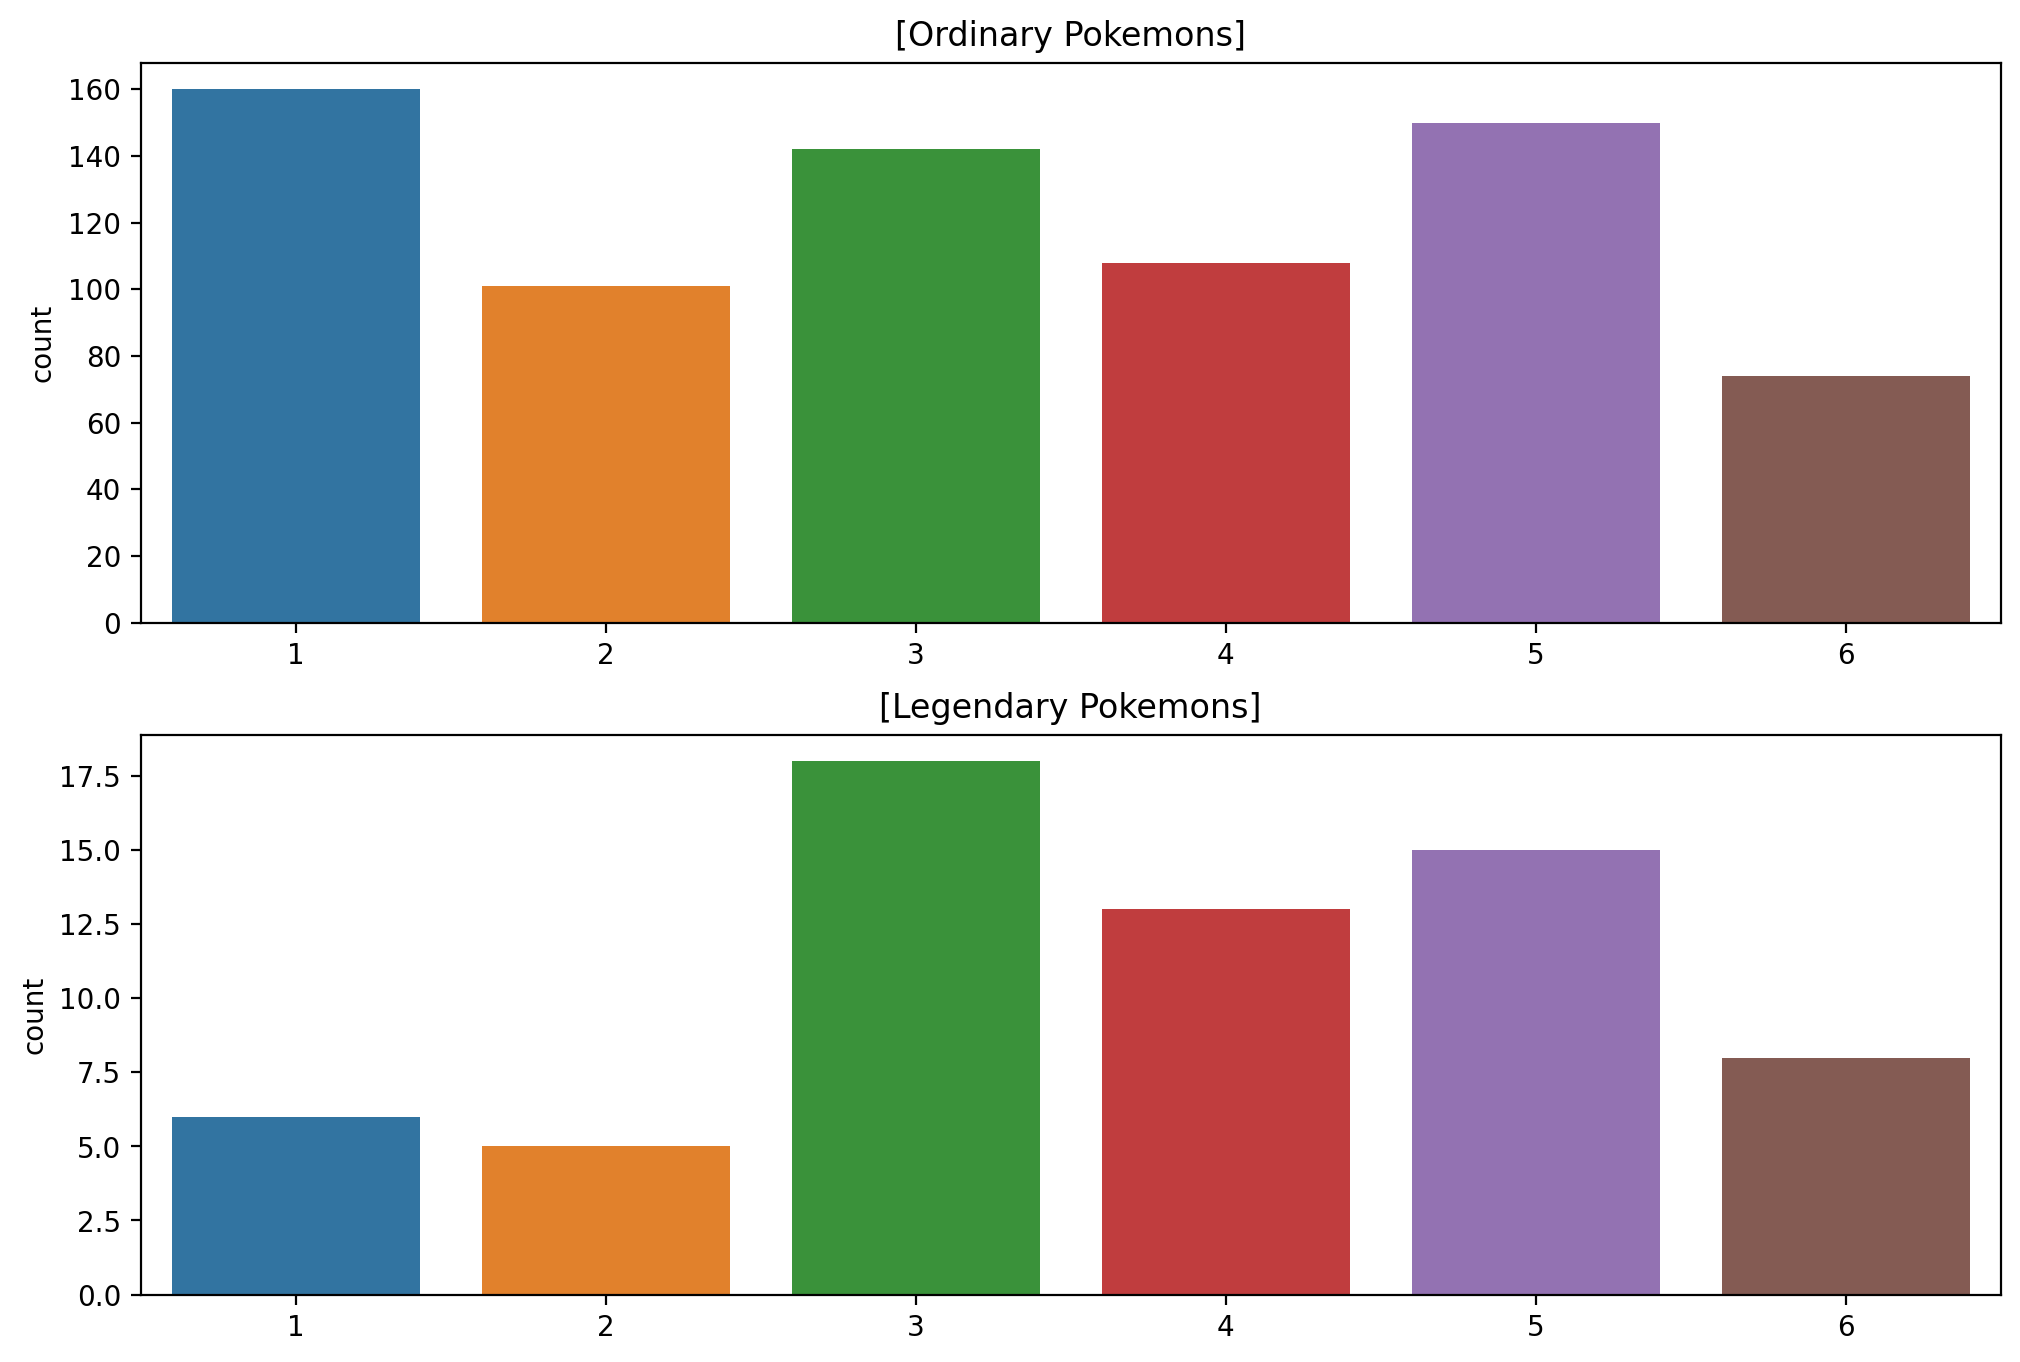

In [25]:
# Generation : 포켓몬의 세대
plt.figure(figsize=(12, 8))

plt.subplot(211)
sns.countplot(data=ordinary, x="Generation").set_xlabel('')
plt.title("[Ordinary Pokemons]")
plt.subplot(212)
sns.countplot(data=legendary, x="Generation").set_xlabel('')
plt.title("[Legendary Pokemons]")
plt.show()

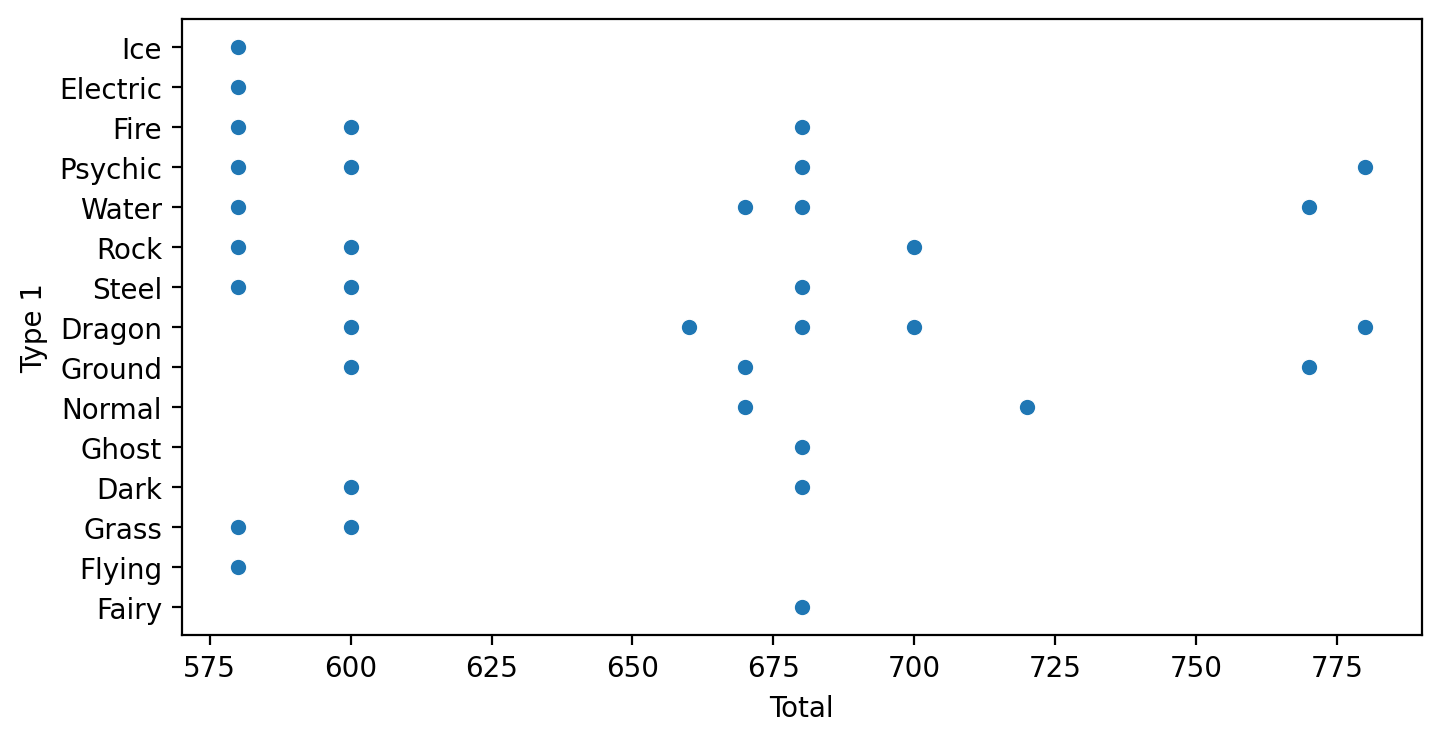

In [26]:
# 전설 포켓몬 Total 값
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.scatterplot(data=legendary, y="Type 1", x="Total")
plt.show()

In [27]:
print(sorted(list(set(legendary["Total"]))))

[580, 600, 660, 670, 680, 700, 720, 770, 780]


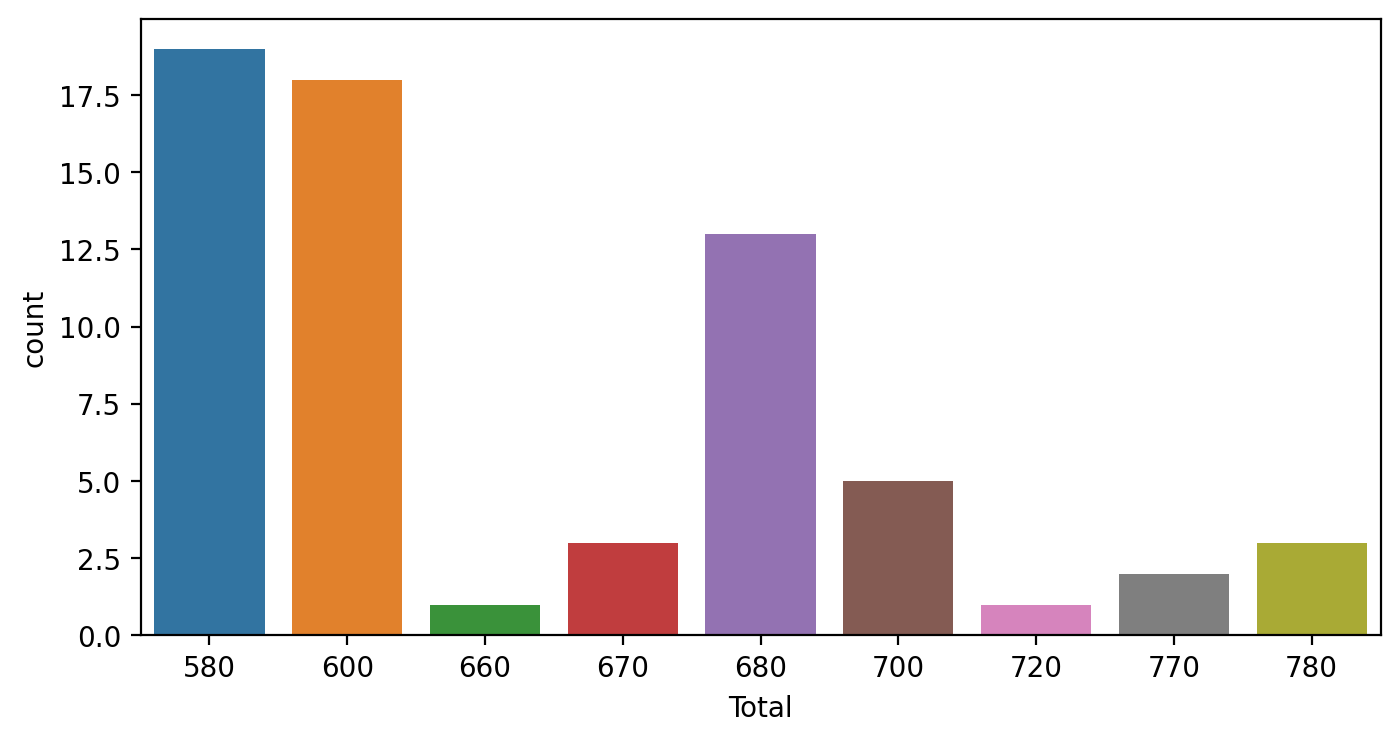

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.countplot(data=legendary, x="Total")
plt.show()

In [29]:
round(65 / 9, 2)
# 7.22 마리만 같은 total 스탯값을 가진다.

7.22

In [30]:
# Q. ordinary 포켓몬의 'Total' 값 집합을 확인해봅시다.
print(sorted(list(set(ordinary["Total"]))))

[180, 190, 194, 195, 198, 200, 205, 210, 213, 215, 218, 220, 224, 236, 237, 240, 244, 245, 250, 251, 253, 255, 260, 262, 263, 264, 265, 266, 269, 270, 273, 275, 278, 280, 281, 285, 288, 289, 290, 292, 294, 295, 299, 300, 302, 303, 304, 305, 306, 307, 308, 309, 310, 313, 314, 315, 316, 318, 319, 320, 323, 325, 328, 329, 330, 334, 335, 336, 340, 341, 345, 348, 349, 350, 351, 352, 355, 358, 360, 362, 363, 365, 369, 370, 371, 375, 380, 382, 384, 385, 390, 395, 400, 401, 405, 409, 410, 411, 413, 414, 415, 418, 420, 423, 424, 425, 428, 430, 431, 435, 438, 440, 442, 445, 446, 448, 450, 452, 454, 455, 456, 458, 460, 461, 462, 464, 465, 466, 467, 468, 470, 471, 472, 473, 474, 475, 479, 480, 481, 482, 483, 484, 485, 487, 488, 489, 490, 494, 495, 497, 498, 499, 500, 505, 507, 508, 509, 510, 514, 515, 518, 519, 520, 521, 523, 525, 528, 530, 531, 534, 535, 540, 545, 550, 552, 555, 560, 565, 567, 575, 579, 580, 590, 594, 600, 610, 615, 618, 625, 630, 634, 635, 640, 670, 700]


In [31]:
# Q. 이 집합의 크기(길이)를 확인해봅시다.
print(len(sorted(list(set(ordinary["Total"])))))

195


In [32]:
round(735 / 195, 2)
# 3.77 마리만 같은 total 스탯값을 가진다.
# Total값의 다양성은 일반 포켓몬이 전설의 포켓몬보다 두 배 가까이 됩니다. 즉 전설의 포켓몬의 Total값은 다양하지 않습니다.
# 한 포켓몬의 Total 속성값이 전설의 포켓몬의 값들 집합에 포함되는지의 여부는 전설의 포켓몬임을 결정하는 데에 영향을 미칩니다.
# 또한, 전설의 포켓몬의 Total 값 중에는 일반 포켓몬이 가지지 못하는 Total값이 존재합니다. ex) 680, 720, 770, 780
# Total값은 전설의 포켓몬인지 아닌지를 결정하는 데에 이러한 방식으로도 영향을 미칠 수 있습니다.

# 즉, Total값은 legendary인지 아닌지를 예측하는 데에 중요한 컬럼일 것이라는 결론을 내릴 수 있습니다.

3.77

In [33]:
# 특정 단어가 들어가 있는 이름
n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57]
names = pd.concat([n1, n2, n3, n4, n5]).reset_index(drop=True)
names

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
1,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
2,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
3,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
4,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
5,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
6,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
7,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
8,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
9,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True


In [34]:
# 이름에 forme가 들어가는 여러 가지 전설의 포켓몬이 있는 경우
formes = names[13:23]
formes

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
13,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
14,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
15,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True
16,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True
17,641,TornadusIncarnate Forme,Flying,NaN,580,79,115,70,125,80,111,5,True
18,641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True
19,642,ThundurusIncarnate Forme,Electric,Flying,580,79,115,70,125,80,111,5,True
20,642,ThundurusTherian Forme,Electric,Flying,580,79,105,70,145,80,101,5,True
21,645,LandorusIncarnate Forme,Ground,Flying,600,89,125,90,115,80,101,5,True
22,645,LandorusTherian Forme,Ground,Flying,600,89,145,90,105,80,91,5,True


In [35]:
# legendary와 ordinary 각각에 모두 "name_count"라는 이름의 길이를 나타내는 컬럼을 만든다
legendary["name_count"] = legendary["Name"].apply(lambda i: len(i))
legendary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,8
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,6
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,7
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,6
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,19


In [36]:
ordinary["name_count"] = ordinary["Name"].apply(lambda i: len(i))
legendary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,8
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,6
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,7
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,6
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,19


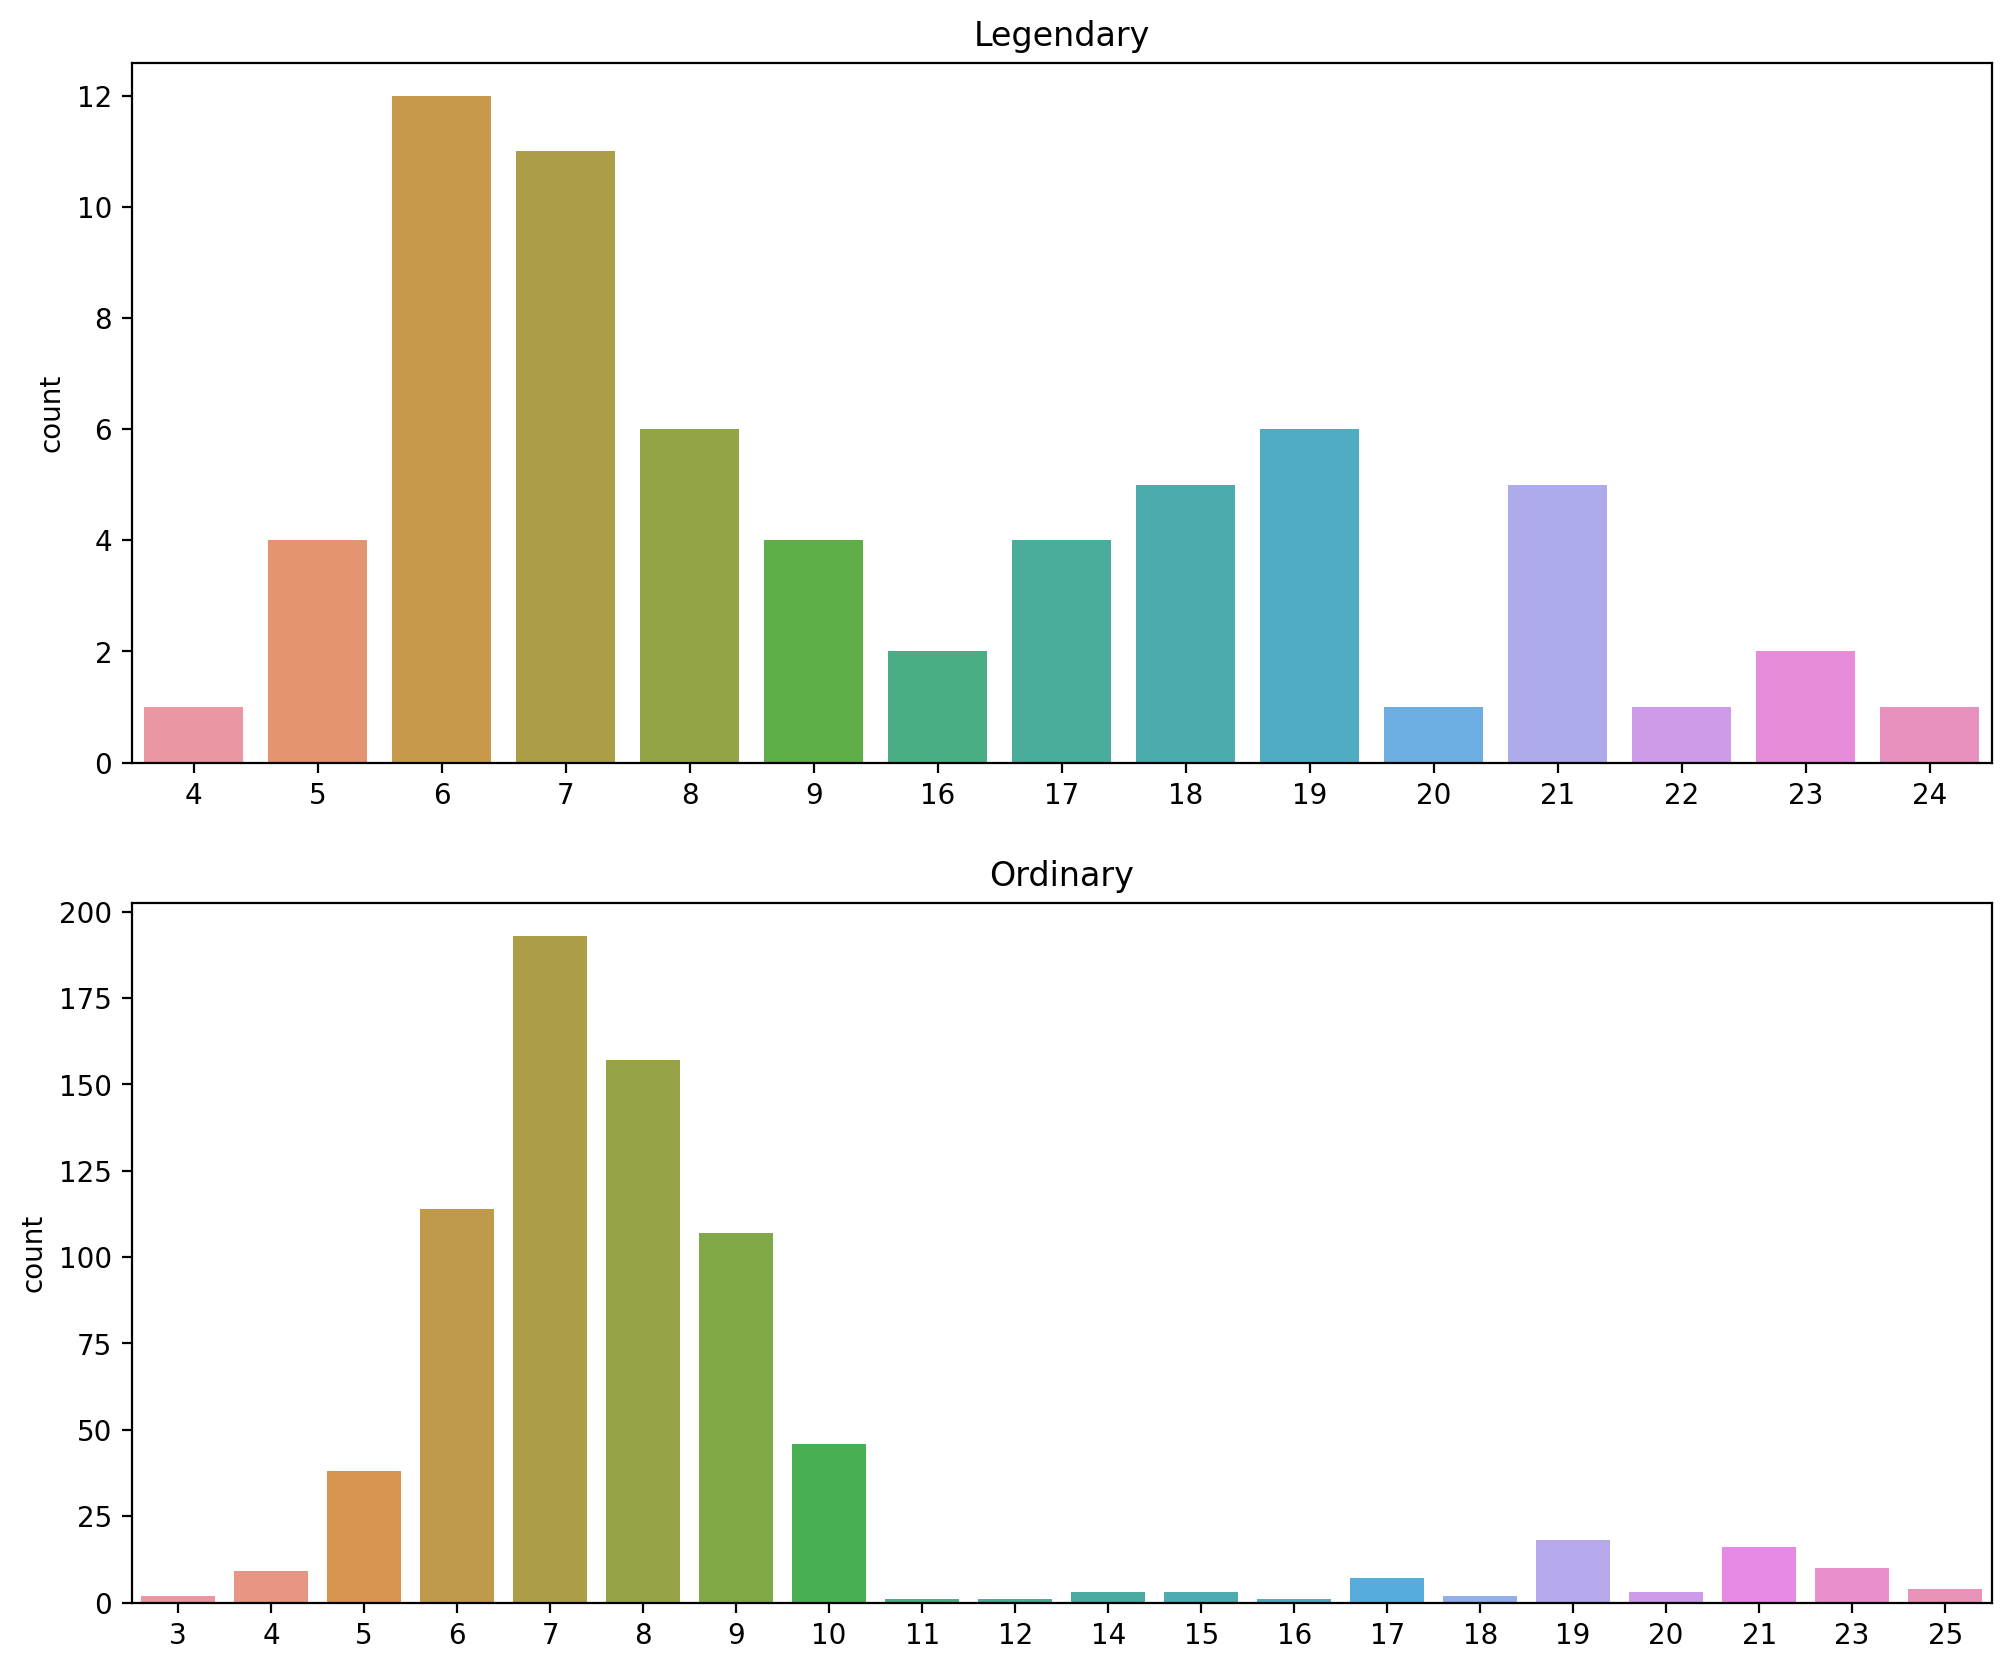

In [37]:
# name_count 특징
plt.figure(figsize=(12, 10))   # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=legendary, x="name_count").set_xlabel('')
plt.title("Legendary")
plt.subplot(212)
sns.countplot(data=ordinary, x="name_count").set_xlabel('')
plt.title("Ordinary")
plt.show()
#  전설의 포켓몬은 16 이상의 긴 이름을 가진 포켓몬이 많은 반면, 일반 포켓몬은 10 이상의 길이를 가지는 이름의 빈도가 아주 낮습니다.

In [38]:
# 전설의 포켓몬의 이름이 10 이상일 확률
print(round(len(legendary[legendary["name_count"] > 9]) / len(legendary) * 100, 2), "%")

41.54 %


In [39]:
# Q. 일반 포켓몬의 이름이 10글자 이상일 확률을 구해보세요.
print(round(len(ordinary[ordinary["name_count"] > 9]) / len(ordinary) * 100, 2), "%")

15.65 %


## 데이터 전처리
문자열 데이터를 처리할 수 없기 때문에 이를 적절한 숫자 데이터 또는 True, False를 나타내는 부울(bool) 데이터 등으로 전처리하는 과정이 필요   
1. 이름의 길이 : name_count 컬럼을 생성 후 길이가 10을 넘는지 아닌지에 대한 categorical 컬럼을 생성
   
2. 토큰 추출 : legendary 포켓몬에서 많이 등장하는 토큰을 추려내고 토큰 포함 여부를 원-핫 인코딩(One-Hot Encoding)으로 처리

### (1) 이름의 길이가 10 이상인가 아닌가

In [40]:
# 전체 데이터가 있는 pokemon 데이터 프레임에 name_count 컬럼을 생성
pokemon["name_count"] = pokemon["Name"].apply(lambda i: len(i))
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


In [41]:
# 이름의 길이가 10 이상이면 True, 미만이면 False를 가지는 long_name 컬럼을 생성
pokemon["long_name"] = pokemon["name_count"] >= 10
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True


In [42]:
# 이름에 알파벳이 아닌 문자가 들어간 경우 전처리
# '알파벳이 아닌 문자'를 포함하는 경우를 처리
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,7,False,Diancie
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,19,True,DiancieMegaDiancie
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,19,True,HoopaHoopaConfined
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,18,True,HoopaHoopaUnbound
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True,9,False,Volcanion


In [43]:
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False,Bulbasaur,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False,Ivysaur,True
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False,Venusaur,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True,VenusaurMegaVenusaur,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True,Charmander,True


In [44]:
print(pokemon[pokemon["name_isalpha"] == False].shape)
pokemon[pokemon["name_isalpha"] == False]

(9, 17)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran♀,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran♀,False
37,32,Nidoran♂,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran♂,False
90,83,Farfetch'd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetch'd,False
131,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon2,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon2,False
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho-oh,False
487,439,Mime Jr.,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon-Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon-Z,False
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [45]:
pokemon = pokemon.replace(to_replace="Nidoran♀", value="Nidoran X")
pokemon = pokemon.replace(to_replace="Nidoran♂", value="Nidoran Y")
pokemon = pokemon.replace(to_replace="Farfetch'd", value="Farfetchd")
pokemon = pokemon.replace(to_replace="Mr. Mime", value="Mr Mime")
pokemon = pokemon.replace(to_replace="Porygon2", value="Porygon Two")
pokemon = pokemon.replace(to_replace="Ho-oh", value="Ho Oh")
pokemon = pokemon.replace(to_replace="Mime Jr.", value="Mime Jr")
pokemon = pokemon.replace(to_replace="Porygon-Z", value="Porygon Z")
pokemon = pokemon.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")

pokemon.loc[[34, 37, 90, 131, 252, 270, 487, 525, 794]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran X,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran X,False
37,32,Nidoran Y,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran Y,False
90,83,Farfetchd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetchd,False
131,122,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon Two,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon Two,False
270,250,Ho Oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho Oh,False
487,439,Mime Jr,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon Z,False
794,718,Zygarde Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [46]:
# Q. 바꿔준 'Name' 컬럼으로 'Name_nospace'를 만들고, 다시 isalpha()로 체크해봅시다.
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon[pokemon["name_isalpha"] == False]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha


#### 이름을 띄어쓰기 & 대문자 기준으로 분리해 토큰화

In [47]:
import re

In [48]:
# 이름 토큰화
def tokenize(name):
    name_split = name.split(" ")
    tokens = []
    for part_name in name_split:
        a = re.findall('[A-Z][a-z]*', part_name)
        tokens.extend(a)

    return np.array(tokens)

In [49]:
# 전설의 포켓몬의 이름에 사용된 토큰
all_tokens = list(legendary["Name"].apply(tokenize).values)

token_set = []
for token in all_tokens:
    token_set.extend(token)

print(len(set(token_set)))
print(token_set)

65
['Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mewtwo', 'Mega', 'Mewtwo', 'X', 'Mewtwo', 'Mega', 'Mewtwo', 'Y', 'Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho', 'Regirock', 'Regice', 'Registeel', 'Latias', 'Latias', 'Mega', 'Latias', 'Latios', 'Latios', 'Mega', 'Latios', 'Kyogre', 'Kyogre', 'Primal', 'Kyogre', 'Groudon', 'Groudon', 'Primal', 'Groudon', 'Rayquaza', 'Rayquaza', 'Mega', 'Rayquaza', 'Jirachi', 'Deoxys', 'Normal', 'Forme', 'Deoxys', 'Attack', 'Forme', 'Deoxys', 'Defense', 'Forme', 'Deoxys', 'Speed', 'Forme', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Heatran', 'Regigigas', 'Giratina', 'Altered', 'Forme', 'Giratina', 'Origin', 'Forme', 'Darkrai', 'Shaymin', 'Land', 'Forme', 'Shaymin', 'Sky', 'Forme', 'Arceus', 'Victini', 'Cobalion', 'Terrakion', 'Virizion', 'Tornadus', 'Incarnate', 'Forme', 'Tornadus', 'Therian', 'Forme', 'Thundurus', 'Incarnate', 'Forme', 'Thundurus', 'Therian', 'Forme', 'Reshiram', 'Zekrom', 'Landorus', 'Incarnate', 'Forme', 'Landorus', 'Therian', 'Form

In [50]:
from collections import Counter
# Counter(a).most_common() : 가장 많은 요소와 등장 횟수가 무엇인지를 정렬

In [51]:
# token_set에는 어떤 토큰이 가장 많이 쓰였는지 찾기
# most_common() 함수에 인자로 숫자를 넣어주면 원하는 개수만큼만 출력
most_common = Counter(token_set).most_common(10)
most_common

[('Forme', 15),
 ('Mega', 6),
 ('Mewtwo', 5),
 ('Kyurem', 5),
 ('Deoxys', 4),
 ('Hoopa', 4),
 ('Latias', 3),
 ('Latios', 3),
 ('Kyogre', 3),
 ('Groudon', 3)]

In [52]:
# 전설의 포켓몬 이름에 등장하는 토큰이 포켓몬의 이름에 있는지의 여부를 나타내는 컬럼
# 문자열 데이터셋에 특정 구문이 포함되어 있는지 여부는 str.contains 함수로 간단히 확인
for token, _ in most_common:
    # pokemon[token] = ... 형식으로 사용하면 뒤에서 warning이 발생합니다
    pokemon[f"{token}"] = pokemon["Name"].str.contains(token)

pokemon.head(10)

# 최종 : 문자열로 구성된 이름을 전처리를 통해 True, False의 부울 데이터로 변환

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Forme,Mega,Mewtwo,Kyurem,Deoxys,Hoopa,Latias,Latios,Kyogre,Groudon
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,False,False,False,False,False,False,False,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,False,False,False,False,False,False,False,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,False,False,False,False,False,False,False,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,False,True,False,False,False,False,False,False,False,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,False,False,False,False,False,False,False,False,False,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,False,False,False,False,False,False,False,False,False,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,...,False,False,False,False,False,False,False,False,False,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,...,False,True,False,False,False,False,False,False,False,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,...,False,True,False,False,False,False,False,False,False,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,...,False,False,False,False,False,False,False,False,False,False


### (3) Type1 & 2! 범주형 데이터 전처리하기   
18가지의 모든 Type를 모두 원-핫 인코딩(One-Hot Encoding)합니다.   

두 가지 속성을 가진 포켓몬은 두 가지 Type에 해당하는 자리에서 1 값을 가지도록 합니다.

In [53]:
print(types)

['Rock', 'Fire', 'Dark', 'Ghost', 'Poison', 'Water', 'Electric', 'Grass', 'Ice', 'Ground', 'Dragon', 'Steel', 'Bug', 'Fairy', 'Normal', 'Psychic', 'Flying', 'Fighting']


In [54]:
for t in types:
    pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)

pokemon[[["Type 1", "Type 2"] + types][0]].head()

,Type 1,Type 2,Rock,Fire,Dark,Ghost,Poison,Water,Electric,Grass,Ice,Ground,Dragon,Steel,Bug,Fairy,Normal,Psychic,Flying,Fighting
0,Grass,Poison,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False
1,Grass,Poison,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False
2,Grass,Poison,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False
3,Grass,Poison,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False
4,Fire,NaN,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#### Baseline

In [55]:
print(original_data.shape)
original_data.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [56]:
original_data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [57]:
# 다음 컬럼 중 의미 없는 컬럼인 #와 문자열 데이터인 Name, Type 1, Type 2 데이터는 제외하고 사용
# target 데이터인 Legendary 제외
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']
target = 'Legendary'

In [58]:
# Q. 'original_data'에서 'features' 컬럼에 해당하는 데이터를 변수 'X'에 저장합니다.
X = original_data[features]
print(X.shape)
X.head()

(800, 8)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1


In [59]:
# Q. 'target' 컬럼의 데이터를 변수 'y'에 저장합니다.
y = original_data[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

### 검증 데이터 분리

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 8) (640,)
(160, 8) (160,)


### 머신러닝 - 의사결정나무

In [61]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

In [62]:
# sklearn.metrics의 confusion_matrix로 결과 확인
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

# 위 값은 왼쪽 위부터 순서대로 TN, FP, FN, TP
# 정확도  : TN + TP / TN + FP + FN + TP => 144+8 / 144+16 = 95 %

array([[144,   3],
       [  5,   8]])

데이터가 불균형한 데이터  
800마리를 전부 다 일반 포켓몬으로 예측하더라도, 735마리는 일단 맞히고 들어간다는 것을 뜻합니다.   
즉, 아무런 학습을 안 하고 모든 답을 하나로 찍어도, 735 / 800 * 100 = 92%의 정확도를 달성할 수 있다는 거죠.   
따라서 이번 데이터셋에서는 정확도로 모델의 성능을 평가하는 것은 거의 의미가 없습니다.

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       147
        True       0.73      0.62      0.67        13

    accuracy                           0.95       160
   macro avg       0.85      0.80      0.82       160
weighted avg       0.95      0.95      0.95       160



### (3) 피쳐 엔지니어링 데이터로 학습

In [64]:
# 컬럼 확인
print(len(pokemon.columns))
print(pokemon.columns)

45
Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'name_count',
       'long_name', 'Name_nospace', 'name_isalpha', 'Forme', 'Mega', 'Mewtwo',
       'Kyurem', 'Deoxys', 'Hoopa', 'Latias', 'Latios', 'Kyogre', 'Groudon',
       'Rock', 'Fire', 'Dark', 'Ghost', 'Poison', 'Water', 'Electric', 'Grass',
       'Ice', 'Ground', 'Dragon', 'Steel', 'Bug', 'Fairy', 'Normal', 'Psychic',
       'Flying', 'Fighting'],
      dtype='object')


In [65]:
# '#' ,'Type 1', 'Type 2', 'Name', ''Name_nospace', 'name_isalpha', 'Legendary' 제외

features = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation',
            'name_count','long_name', 'Forme', 'Mega', 'Mewtwo','Deoxys', 'Kyurem', 'Latias', 'Latios',
            'Kyogre', 'Groudon', 'Hoopa','Poison', 'Ground', 'Flying', 'Normal', 'Water', 'Fire',
            'Electric','Rock', 'Dark', 'Fairy', 'Steel', 'Ghost', 'Psychic', 'Ice', 'Bug', 'Grass', 'Dragon', 'Fighting']

len(features)

38

In [66]:
target = "Legendary"
target

'Legendary'

In [67]:
# Q. 사용할 feature에 해당하는 데이터를 'X' 변수에 저장합니다.
X = pokemon[features]
print(X.shape)
X.head()

(800, 38)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,name_count,long_name,...,Dark,Fairy,Steel,Ghost,Psychic,Ice,Bug,Grass,Dragon,Fighting
0,318,45,49,49,65,65,45,1,9,False,...,False,False,False,False,False,False,False,True,False,False
1,405,60,62,63,80,80,60,1,7,False,...,False,False,False,False,False,False,False,True,False,False
2,525,80,82,83,100,100,80,1,8,False,...,False,False,False,False,False,False,False,True,False,False
3,625,80,100,123,122,120,80,1,21,True,...,False,False,False,False,False,False,False,True,False,False
4,309,39,52,43,60,50,65,1,10,True,...,False,False,False,False,False,False,False,False,False,False


In [68]:
# Q. 정답 데이터 'y'도 'target' 변수를 이용해 만들어줍시다.
y = pokemon[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

#### 검증 데이터분리

In [69]:
# 검증 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 38) (640,)
(160, 38) (160,)


### (4) 의사 결정 트리 모델 다시 학습

In [70]:
model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

In [71]:
# Q. train 데이터로 decision tree 모델을 학습시키고
# test 데이터로 모델의 예측 값을 얻어봅시다!
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [72]:
# Q. confusion matrix를 확인해보세요.
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[141,   6],
       [  1,  12]])

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      0.96      0.98       147
        True       0.67      0.92      0.77        13

    accuracy                           0.96       160
   macro avg       0.83      0.94      0.87       160
weighted avg       0.97      0.96      0.96       160



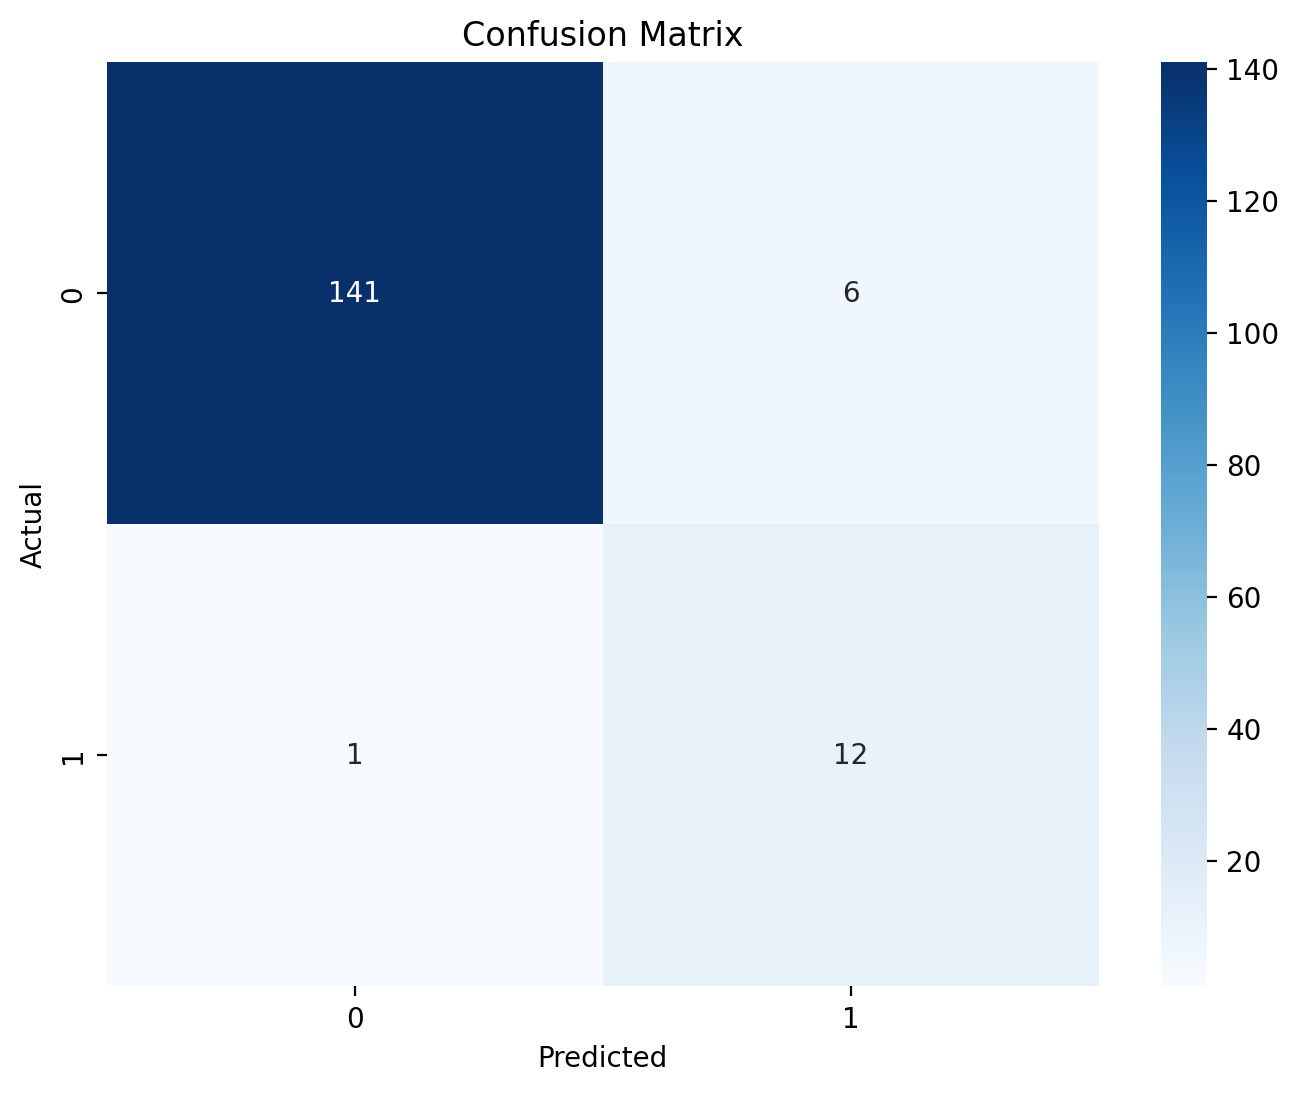

In [74]:
# 오차행렬(confusion_matrix) 시각화
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## 다른 모델 학습

In [75]:
# 데이터 크기
X.shape, y.shape

((800, 38), (800,))

In [76]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Total       800 non-null    int64
 1   HP          800 non-null    int64
 2   Attack      800 non-null    int64
 3   Defense     800 non-null    int64
 4   Sp. Atk     800 non-null    int64
 5   Sp. Def     800 non-null    int64
 6   Speed       800 non-null    int64
 7   Generation  800 non-null    int64
 8   name_count  800 non-null    int64
 9   long_name   800 non-null    bool 
 10  Forme       800 non-null    bool 
 11  Mega        800 non-null    bool 
 12  Mewtwo      800 non-null    bool 
 13  Deoxys      800 non-null    bool 
 14  Kyurem      800 non-null    bool 
 15  Latias      800 non-null    bool 
 16  Latios      800 non-null    bool 
 17  Kyogre      800 non-null    bool 
 18  Groudon     800 non-null    bool 
 19  Hoopa       800 non-null    bool 
 20  Poison      800 non-null    bool

In [77]:
# 수치형 변수
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols = [
    'Total',
    'HP',
    'Attack',
    'Defense',
    'Sp. Atk',
    'Sp. Def',
    'Speed',
    'Generation',
    'name_count'
]

X[cols] = scaler.fit_transform(X[cols])
display(X.head(3))

<ipython-input-77-3e98836dee1c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cols] = scaler.fit_transform(X[cols])


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,name_count,long_name,...,Dark,Fairy,Steel,Ghost,Psychic,Ice,Bug,Grass,Dragon,Fighting
0,0.230,0.173228,0.237838,0.195556,0.298913,0.214286,0.228571,0.0,0.272727,False,...,False,False,False,False,False,False,False,True,False,False
1,0.375,0.232283,0.308108,0.257778,0.380435,0.285714,0.314286,0.0,0.181818,False,...,False,False,False,False,False,False,False,True,False,False
2,0.575,0.311024,0.416216,0.346667,0.489130,0.380952,0.428571,0.0,0.227273,False,...,False,False,False,False,False,False,False,True,False,False


### 검증 데이터 분리

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 38) (640,)
(160, 38) (160,)


In [79]:
X_train.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,name_count,long_name,...,Dark,Fairy,Steel,Ghost,Psychic,Ice,Bug,Grass,Dragon,Fighting
694,0.200000,0.200787,0.324324,0.200000,0.190217,0.142857,0.188571,0.8,0.090909,False,...,True,False,False,False,False,False,False,False,True,False
265,0.200000,0.192913,0.318919,0.200000,0.190217,0.142857,0.205714,0.2,0.227273,False,...,False,False,False,False,False,False,False,False,False,False
448,0.138333,0.173228,0.324324,0.128889,0.163043,0.066667,0.228571,0.6,0.090909,False,...,False,False,False,False,False,False,False,False,False,False
321,0.490000,0.562992,0.621622,0.244444,0.163043,0.190476,0.257143,0.4,0.227273,False,...,False,False,False,False,False,False,False,False,False,True
623,0.205000,0.145669,0.135135,0.355556,0.244565,0.214286,0.142857,0.8,0.136364,False,...,False,False,False,True,False,False,False,False,False,False


### 머신러닝 - XGBoost

In [80]:
# 분류모델 성능평가 계산
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score
model = XGBClassifier(random_state=2022)
model.fit(X_train, y_train)
xgb_pred = model.predict(X_test)

print("정확도 : ", accuracy_score(y_test, xgb_pred))
print("민감도 : ", recall_score(y_test, xgb_pred))
print("f1_score : ", f1_score(y_test, xgb_pred))
print("혼동행렬\n",confusion_matrix(y_test, xgb_pred))
print("\nclassification report:\n", classification_report(y_test, xgb_pred))

정확도 :  1.0
민감도 :  1.0
f1_score :  1.0
혼동행렬
 [[148   0]
 [  0  12]]

classification report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       148
        True       1.00      1.00      1.00        12

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160



### 머신러닝 - RandomForest

In [81]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=10, random_state=2022)
model.fit(X_train, y_train)
rf_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, rf_pred)
recall_score = recall_score(y_test, rf_pred)
f1_score = f1_score(y_test, rf_pred)
con_matrix = confusion_matrix(y_test, rf_pred)
print("정확도 : ",accuracy)
print("민감도 : ", recall_score)
print("f1_score : ", f1_score)
print("\n혼동행렬\n", con_matrix)
print("classification_report:\n", classification_report(y_test, rf_pred))

정확도 :  0.9625
민감도 :  0.5833333333333334
f1_score :  0.7000000000000001

혼동행렬
 [[147   1]
 [  5   7]]
classification_report:
               precision    recall  f1-score   support

       False       0.97      0.99      0.98       148
        True       0.88      0.58      0.70        12

    accuracy                           0.96       160
   macro avg       0.92      0.79      0.84       160
weighted avg       0.96      0.96      0.96       160



# 회고

데이터 전처리 과정도 중요하지만 그 전에 데이터 셋을 확인하고 변수들의 상관관계를 파악 및 필요없는 변수는 제외시키는 과정, 데이터 전처리 시 중복이름 제거, 유니크 이름 추출과정이 복잡하면서도 정말 필수적으로 해야되는 과정이라는 것을 알게 되었다.   
아쉬운점은 분류모델에서 이론으로만 배웠던 분류모델 성능평가를 직접 코딩하고 각 분류 모델과 비교하는 과정을 통해 어떤부분에서 이론적으로 정확도, 민감도, f1과 혼동행렬로 무엇을 평가할 수 있는지 알지 못해 이론을 좀 더 공부해야 겠다고 생각되었다.   
   
처음부터 끝까지 가이드따라 해외여행 관광하러 온 느낌였는데, 다른 예제들을 해보면서 나홀로 가이드를 할 수 있을만큼 시간과 노오오오력이 필요하다.